# [과제 2] 회귀분석

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

## 0. Data 및 과제 설명 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

### > 과제 분석목표: 중고차 관련 설명변수(X)를 이용하여 중고차 가격(Y)을 예측하는 회귀분석을 수행해보자 <

## 1. Data 로드 

In [352]:
# Load Data 
data = pd.read_csv("data/w2_regression_assignment2_data.csv", index_col=0)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [353]:
data.shape # 총 6019개의 데이터

(6019, 13)

In [354]:
# 결측치 파악
data.isnull().sum() # Mileage, Engine, Power, Seats, New_Price에 결측치 있음

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [358]:
# 결측행 제거
data = data.dropna(subset=['Mileage','Engine','Power','Seats'])
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [359]:
# New_Price도 결측치가 너무 많으므로 분석에서 제외
data.drop('New_Price', axis=1, inplace=True)

In [360]:
# data type 파악
data.info()

# 범주형 설명변수: Name, Location, Fuel_Type, Transmission, Owner_Type
# 수치형 설명변수: Year, Kilometers_Driven, Mileage, Engine, Power, Seats
# 종속변수: Price

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


## 2. Data 전처리
####  수치형 변수인 Mileage, Engine, Power, New_Price 단위 빼고 datatype 수치형으로 변환

In [361]:
# 1. Mileage
data.Mileage

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 5975, dtype: object

In [363]:
# km/kg -> kmpl 단위변환 하고 값만 
Correct_Mileage= []
for i in data.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-5]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-5]
        Correct_Mileage.append(float(i))            


In [364]:
Correct_Mileage

[37.24,
 19.67,
 18.2,
 20.77,
 15.2,
 29.54,
 23.08,
 11.36,
 20.54,
 22.3,
 21.56,
 16.8,
 25.2,
 12.7,
 0.0,
 13.5,
 25.8,
 28.4,
 20.45,
 14.84,
 22.69,
 23.65,
 13.53,
 18.5,
 14.4,
 16.8,
 23.08,
 20.92,
 17.5,
 12.8,
 19.01,
 14.53,
 11.18,
 12.4,
 16.09,
 14.0,
 24.3,
 18.15,
 11.74,
 22.07,
 19.7,
 25.4,
 25.32,
 18.5,
 14.62,
 14.28,
 14.9,
 11.25,
 24.4,
 16.55,
 17.11,
 22.9,
 17.8,
 28.4,
 18.9,
 15.04,
 25.17,
 20.36,
 13.29,
 18.2,
 13.68,
 20.0,
 11.74,
 15.8,
 25.0,
 16.55,
 16.4,
 0.0,
 24.52,
 22.1,
 8.5,
 15.1,
 16.95,
 19.64,
 16.5,
 18.53,
 17.8,
 12.4,
 12.8,
 0.0,
 22.9,
 17.57,
 18.0,
 20.0,
 23.2,
 17.8,
 16.73,
 20.36,
 18.9,
 17.0,
 17.8,
 13.0,
 17.68,
 22.7,
 15.1,
 25.8,
 22.07,
 16.2,
 18.9,
 15.26,
 23.0,
 18.5,
 19.83,
 14.94,
 17.0,
 14.0,
 17.71,
 14.74,
 16.0,
 22.32,
 11.36,
 15.1,
 25.4,
 22.69,
 13.5,
 12.99,
 23.3,
 19.15,
 10.8,
 24.3,
 17.0,
 15.0,
 22.0,
 18.9,
 21.9,
 12.05,
 11.7,
 37.24,
 10.8,
 21.21,
 20.73,
 16.0,
 21.1,
 24.07,
 19.0,


In [365]:
data.Mileage = Correct_Mileage

In [366]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998 CC,67.1 bhp,5.0,2.65


In [367]:
# 2. Engine
data['Engine']

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
6014    1248 CC
6015    1120 CC
6016    2498 CC
6017     998 CC
6018     936 CC
Name: Engine, Length: 5975, dtype: object

In [368]:
# Engine 단위 빼고 값만 저장
correct_engine = []
unit_engine = []
for i in data.Engine:
    i = str(i)
    value = i[:-3]
    unit = i[-2:]
    correct_engine.append(float(value))
    unit_engine.append(unit)
    
set(unit_engine) # 모두 'CC' 단위임

{'CC'}

In [369]:
# data의 Engine에 단위 빼고 값만 저장
data.Engine = correct_engine
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.1 bhp,5.0,2.65


In [370]:
# 3. Power
data.Power

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 5975, dtype: object

In [371]:
correct_power=[]
unit_power=[]
for i in data['Power']:
    i = str(i)
    value = i[:-4]
    unit = i[-3:]
    correct_power.append(value)    
    unit_power.append(unit)

set(unit_power) #단위 모두 'bhp'

{'bhp'}

In [372]:
correct_power #null 있음

['58.16',
 '126.2',
 '88.7',
 '88.76',
 '140.8',
 '55.2',
 '63.1',
 '171.5',
 '103.6',
 '74',
 '103.25',
 '116.3',
 '74',
 '187.7',
 '115',
 '175.56',
 '98.6',
 '74',
 '83.8',
 '167.62',
 '190',
 '88.5',
 '177.01',
 '80',
 '103.6',
 '116.3',
 '63.1',
 '67.1',
 '88.7',
 '102',
 '108.45',
 '138.1',
 '184',
 '179.5',
 '103.5',
 '64',
 '88.5',
 '82',
 '254.8',
 '73.9',
 '46.3',
 '37.5',
 '77',
 '82.9',
 '149.92',
 '138.03',
 '112.2',
 '163.7',
 '71',
 '105',
 '174.33',
 '74',
 '75',
 '74',
 '82',
 '103.2',
 '53.3',
 '78.9',
 '147.6',
 '67.1',
 '147.8',
 '68',
 '186',
 '170',
 '69',
 '140',
 '78',
 '194',
 '88.5',
 '88.7',
 '500',
 '140',
 '78.9',
 '108.5',
 '86.8',
 '187.74',
 'null',
 '132',
 '102',
 'null',
 '74',
 '88.7',
 '86.7',
 '68',
 '73.94',
 '117.3',
 '218',
 '78.9',
 '82',
 'null',
 '86.7',
 '168.5',
 '174.33',
 '89.84',
 '140',
 '98.6',
 '73.9',
 '110',
 '67.1',
 '103.5',
 '90',
 '82.85',
 '67',
 '241.4',
 '80',
 '35',
 '78.9',
 '270.9',
 '140',
 '126.32',
 '171.5',
 '73',
 '37

In [373]:
null_power_idx = []
for i in range(len(correct_power)):
    if correct_power[i] == 'null':
        null_power_idx.append(i)

len(null_power_idx) 

103

In [375]:
null_power_idx

[76,
 79,
 89,
 120,
 143,
 225,
 242,
 259,
 304,
 305,
 383,
 421,
 425,
 440,
 469,
 572,
 628,
 644,
 645,
 735,
 744,
 824,
 910,
 921,
 929,
 1063,
 1138,
 1148,
 1266,
 1313,
 1338,
 1380,
 1411,
 1546,
 1569,
 1640,
 1663,
 1848,
 1989,
 2043,
 2118,
 2152,
 2250,
 2254,
 2292,
 2328,
 2377,
 2425,
 2434,
 2481,
 2485,
 2511,
 2561,
 2579,
 2616,
 2621,
 2868,
 3010,
 3038,
 3081,
 3166,
 3224,
 3266,
 3414,
 3491,
 3506,
 3562,
 3601,
 3611,
 3618,
 3642,
 3706,
 3868,
 3900,
 3969,
 4046,
 4049,
 4318,
 4321,
 4593,
 4672,
 4676,
 4706,
 4792,
 4848,
 4862,
 4914,
 5024,
 5078,
 5186,
 5383,
 5395,
 5415,
 5486,
 5490,
 5604,
 5712,
 5716,
 5818,
 5830,
 5881,
 5899,
 5941]

In [376]:
# 총 103개가 null값이므로 전체 데이터에서 해당 index의 행을 제거한다
data.reset_index(drop=True, inplace=True)
data.Power = correct_power
data = data.drop(null_power_idx, axis=0)
data.Power = data.Power.astype(float)
data.Power

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
5970     74.00
5971     71.00
5972    112.00
5973     67.10
5974     57.60
Name: Power, Length: 5872, dtype: float64

In [377]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [378]:
data.reset_index(drop=True, inplace=True)

In [379]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
5868,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
5869,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
5870,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [380]:
# 종속변수 Y, 설명변수 X 분리 
X = data.drop('Price', axis=1)
Y = data.Price
X

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0
5868,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0
5869,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0
5870,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0


#### 데이터 전처리 완료
###### * 데이터개수: 5872, 설명변수 개수: 11개
###### * 범주형: Name, Location, Fuel_Type, Transmission, Owner_Type / 수치형: Year, Kilometers_Driven, Mileage, Engine, Power, Seats

## 2. 회귀진단 

####  - 회귀분석을 진행하기 전 수치형 변수에 대해 가정을 만족하는지 진단해보자

####  Y와 X 간 선형성

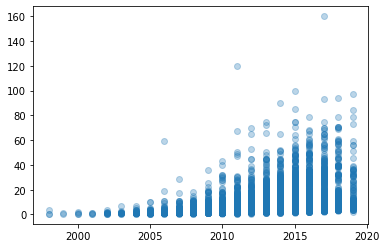

In [382]:
plt.scatter(X['Year'],Y, alpha=0.3)

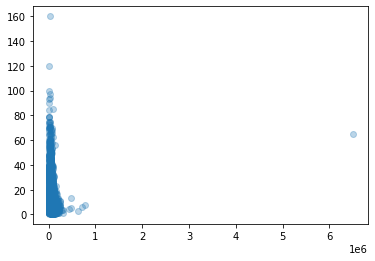

In [383]:
plt.scatter(X['Kilometers_Driven'],Y, alpha=0.3)
# 선형성 만족 x

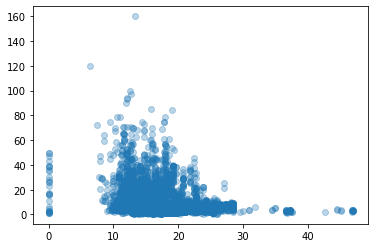

In [384]:
plt.scatter(X['Mileage'],Y, alpha=0.3)

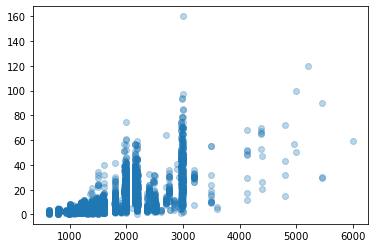

In [385]:
plt.scatter(X['Engine'],Y, alpha=0.3)

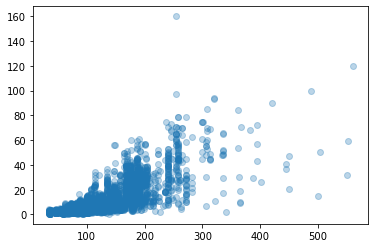

In [386]:
plt.scatter(X['Power'],Y, alpha=0.3)

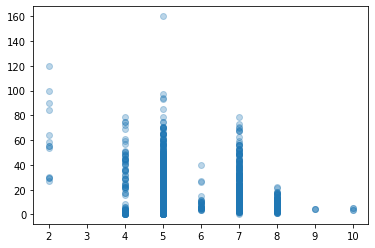

In [387]:
plt.scatter(X['Seats'],Y, alpha=0.3)
# 선형성 만족x